# Berkenalan dengan filter (atau kernel) pada pengolahan citra digital

Mengapa perlu berkenalan dengan filter digital?

1. Filter pada citra digital menjadi dasar pemahaman operasi konvolusi. 
2. Jika kita mengetahui fungsi filter pada pengolahan citra digital, intuisi untuk memahami transfer learning akan lebih mudah.

Filter yang digunakan pada contoh ini adalah filter laplace dan filter sobel

## Prerequisite:

- Simpel aljabar linear
- Neural Network
- Convolutional Neural Network

![dont_worry](https://miro.medium.com/max/1870/1*E4_pTJctmAofSRpZCZbv-g.jpeg)

In [1]:
# import library yang dibutuhkan
import os
import fnmatch
import numpy as np
import skimage
from skimage import filters, io, util
from skimage import exposure
from matplotlib import pyplot

In [2]:
# buat daftar citra pada folder bicycle_final
fpath = "../subset_stanford_online_products/bicycle_final/"
fnames = os.listdir(fpath)
fnames[:3]

['400931080828_7.JPG', '321820322214_3.JPG', '161777354031_4.JPG']

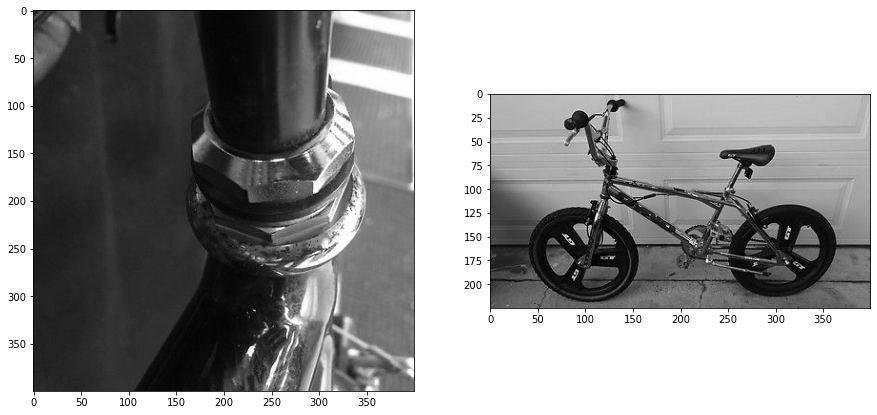

In [3]:
# ambil dua citra sebagai contoh
# citra dimuat sebagai citra grayscale karena filter umumnya bekerja dengan citra satu channel
im1 = io.imread(fpath + fnames[1], as_gray=True)
im2 = io.imread(fpath + fnames[2], as_gray=True)

pyplot.figure(figsize=(15, 15))
pyplot.subplot(121)
pyplot.imshow(im1, cmap="gray")
pyplot.subplot(122)
pyplot.imshow(im2, cmap="gray")
pyplot.show()

## Filter laplace untuk edge detection

![filter_laplace](https://wikimedia.org/api/rest_v1/media/math/render/svg/a58cb62fc6fb6a8ecf95edd1060c8a35d50963a4)

Sumber: https://en.wikipedia.org/wiki/Discrete_Laplace_operator

## Filter sobel untuk edge detection

![filter_sobel](https://wikimedia.org/api/rest_v1/media/math/render/svg/848abd56e0e33cf402f01183bfe1f68a93fb34a9)

Sumber: https://en.wikipedia.org/wiki/Sobel_operator

# Ilustrasi operasi konvolusi antara filter dengan citra masukan

- Konvolusi adalah operasi jumlah dari hasil perkalian matrix element wise antara filter / kernel dengan citra.
- Konvolusi akan menghasilkan output yang disebut dengan fitur atau convolved feature
- Fitur ini digunakan oleh classifier (KNN, Random Forest, SVM, **Neural Network**) untuk mengklasifikasi citra.

![convolution_operation](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

# Hasil konvolusi filter dengan citra

In [4]:
# apply filter laplace dan sobel pada citra masukan
def apply_filters(im_input):
    im_laplace = filters.laplace(im_input)
    im_sobel_h = filters.sobel_h(im_input)
    im_sobel_v = filters.sobel_v(im_input)
    return im_laplace, im_sobel_h, im_sobel_v

In [5]:
def plot_im(im1, im2):
    pyplot.figure(figsize=(15, 15))
    pyplot.subplot(121)
    pyplot.imshow(im1, cmap="seismic")
    pyplot.subplot(122)
    pyplot.imshow(im2, cmap="seismic")
    pyplot.show()

In [6]:
im1_laplace, im1_sobel_h, im1_sobel_v = apply_filters(im1)
im2_laplace, im2_sobel_h, im2_sobel_v = apply_filters(im2)

## Filter laplace

Citra keluaran dari filter laplace adalah garis tepi pada citra. Keluaran ini merupakan fitur (fitur garis tepi) yang diambil dari citra masukan.

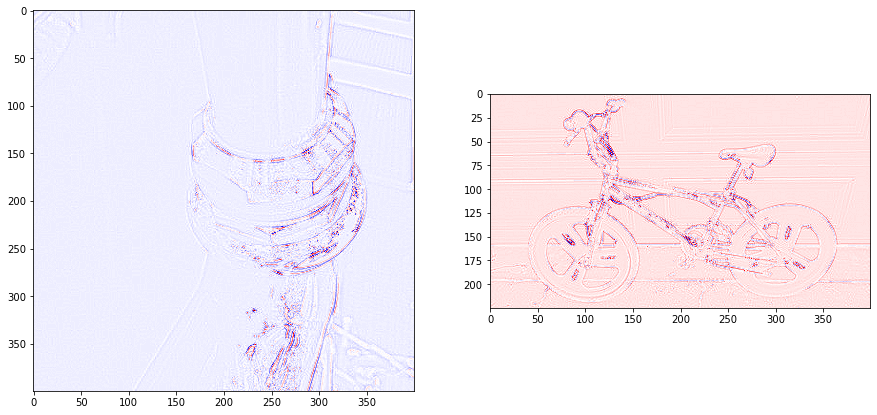

In [7]:
plot_im(im1_laplace, im2_laplace)

## Filter sobel

Filter sobel mirip dengan filter laplace, yaitu mengambil fitur garis tepi dari citra masukan. Garis tepi terbagi menjadi dua, garis tepi horizontal dan garis tepi vertikal.

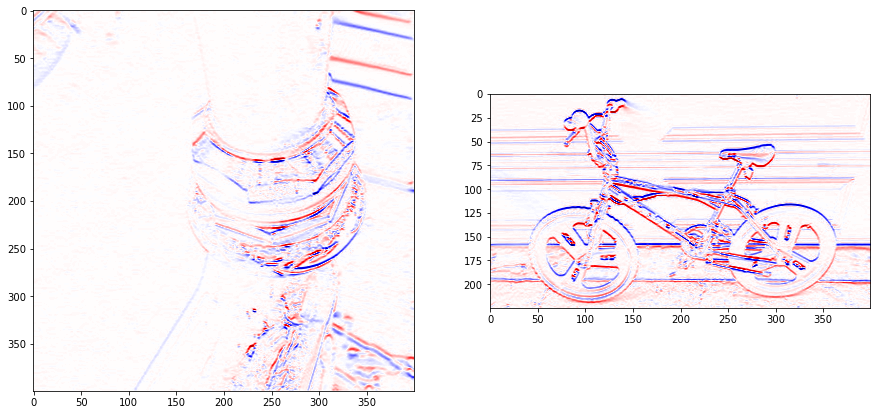

In [8]:
plot_im(im1_sobel_h, im2_sobel_h)

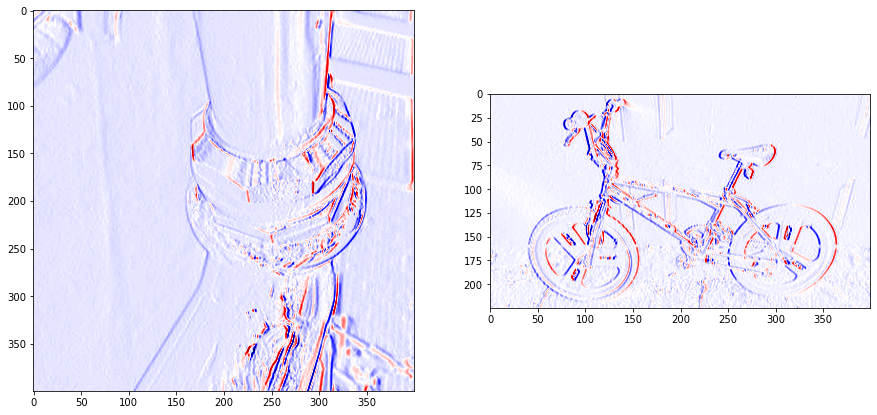

In [9]:
plot_im(im1_sobel_v, im2_sobel_v)

## Take away:

1. Operasi konvolusi merupakan perkalian matriks element wise antara filter (matriks kecil) dengan citra (matriks besar).
2. Operasi konvolusi akan mengekstrak fitur dari citra masukan. Pada contoh kali ini fitur yang diambil adalah garis tepi.

# Quick Glance of Convolutional Neural Network (CNN)

Terdapat dua bagian utama dari CNN:
1. Feature learning / feature extraction : convolutional layer & pooling layer
2. Classification : fully connected layer / neural network

Convention:
- Shallower layer (lapisan lebih dangkal) adalah layer / lapisan yang dekat dengan input
- Deeper layer (lapisan lebih dalam) adalah layer / lapisan yang dekat dengan output

![cnn_flow](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

## Convolution
CNN akan menggunakan sejumlah filter (banyak) sehingga membentuk `3D volumes of neurons`.
Bayangkan filter-filter seperti Laplace / Sobel namun dengan kombinasi angka-angka yang berbeda dipakai untuk operasi konvolusi pada citra masukan. Masing-masing filter ini akan menghasilkan *convolved feature*.

![convolutional_layer](https://cs231n.github.io/assets/cnn/depthcol.jpeg)

## Pooling

Operasi pooling akan mereduksi dimensi tensor *convolved feature* sehingga beban komputasi berkurang. Pada contoh gambar dibawah ini operasi max pooling akan mengambil nilai maksimum dari wilayah operasi (2 x 2)

![pooling_layer](https://cs231n.github.io/assets/cnn/maxpool.jpeg)

## Fully Connected Layer

Fully connected layer merupakan neural network yang bertugas mengklasifikasikan fitur yang sudah diekstrak ke dalam masing-masing kelas yang sudah diketahui sebelumnya.

![fcl](https://miro.medium.com/max/700/1*kToStLowjokojIQ7pY2ynQ.jpeg)

## Take away:

Q: Filter apa saja yang diperlukan untuk mengambil fitur dari sebuah citra masukan? Perlukah kita mendefinisikan setiap filter?

A: Algoritma deep learning convolutional neural network dapat belajar dan memodelkan filter-filter ini secara otomatis, tidak perlu didefinisikan oleh programmer. Proses learning / training akan mencari nilai dari filter dan neuron.

# Transfer Learning

Transfer learning menggunakan bobot filter yang sudah dilatih sebelumnya (pre-trained model). Pre-trained model ini biasanya dilatih dengan dataset ImageNet. 

Ketika melatih model dengan pendekatan transfer learning:
1. Kita mengganti bagian classifier (fully connected layer) dengan classifier baru.
2. Kita membekukan bagian convolution agar bobot yang sudah dilatih sebelumnya tidak ikut berubah selama melatih bagian classifier

Keterangan gambar:
- Kiri : model pre-trained
- Tengah : model pre-trained diambil bagian konvolusi saja
- Kanan : pengguna menambahkan classifier baru pada model pre-trained

<!-- ![transferlearning](https://camo.githubusercontent.com/2de162f6f3587a0422389355909594413ae17742/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368352f7377617070696e675f66635f636c61737369666965722e706e67)
-->


![transfer_learning](https://pyimagesearch.com/wp-content/uploads/2019/06/fine_tuning_keras_network_surgery.png)

3. Kita bisa melakukan fine tuning terhadap bobot bagian convolution

Keterangan gambar:
- Kiri: model mula-mula dilatih bagian classifier terlebih dahulu sambil membekukan bobot pre-trained bagian convolution (bobot tidak diperbaharui selama proses training)
- Kanan: model dilakukan fine-tuning pada bagian convolution.

![fine_tuning](https://pyimagesearch.com/wp-content/uploads/2019/06/fine_tuning_keras_freeze_unfreeze.png)

## Take away:

Q: Mengapa CNN dapat di-transfer-kan untuk citra masukan yang berbeda-beda? Misal citra sepeda, citra kucing, citra mobil.

A: Filter berfungsi untuk mengekstrak fitur dari citra masukan. Citra yang satu dengan yang lain memiliki kesamaan, yaitu fitur seperti garis-garis yang sudah kita lihat akan selalu ada dalam citra apapun. Sehingga filter ini bisa digunakan untuk citra sepeda, ataupun citra lainnya.

# Suplementari material

- [François Chollet Github](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb)
- [CS231n - Transfer Learning](https://cs231n.github.io/transfer-learning/)
- [Keras Documentation](https://keras.io/guides/transfer_learning/)
- [How transferable are features in deep neural networks?](https://arxiv.org/abs/1411.1792)
- [CS230 - Deep Learning](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

# Personal learning path

- [Deep Learning @Coursera by Andrew Ng](https://www.coursera.org/specializations/deep-learning)
- [Deep Learning with Python by François Chollet](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)
- [Deep Learning for Computer Vison by Adrian Rosebrock](https://www.pyimagesearch.com/deep-learning-computer-vision-python-book/)
- [Keras Documentation](https://keras.io/guides/transfer_learning/)
- [How transferable are features in deep neural networks?](https://arxiv.org/abs/1411.1792)

# Eksposisi Code Transfer learning

Library deep learning yang digunakan adalah [Keras](https://keras.io/).

1. Arsitektur classifier seperti apa yang perlu ditambahkan pada bagian akhir CNN?
1. Bagaimana memproses citra masukan?
1. Additional quest:
    1. Apa perbedaan akurasi model end to end learning dengan transfer learning?
    1. Berapa banyak layer yang perlu di-fine tune?


## The Task: Object Classification

Klasifikasi pada tugas computer vision adalah tugas untuk memprediksi label dari citra masukan. Klasifikasi merupakan tugas supervised learning, di mana citra training sudah diberi label sebelumnya.

## The Dataset: Stanford online products dataset

https://cvgl.stanford.edu/projects/lifted_struct/

In [10]:
dir_ds = "../subset_stanford_online_products/"
pattern = "*.JPG"
im_dict = dict()

for path, subdirs, files in os.walk(dir_ds):
    for x in subdirs:
        im_dict[x] = list()
    for name in files:
        if fnmatch.fnmatch(name, pattern):
            get_dir = path.split("/")[-1]
            im_dict[get_dir].append(name)

In [11]:
im_dict

{'kettle_final': ['111723056644_2.JPG',
  '201409096922_1.JPG',
  '391214805953_5.JPG',
  '131576445078_0.JPG',
  '201385903777_4.JPG',
  '111725406649_0.JPG',
  '271960433454_7.JPG',
  '261979171872_1.JPG',
  '321348662094_3.JPG',
  '171879474102_0.JPG',
  '252061267777_3.JPG',
  '131580420508_1.JPG',
  '301717115471_3.JPG',
  '201381677801_5.JPG',
  '331410184738_6.JPG',
  '171890931471_2.JPG',
  '231637580281_6.JPG',
  '400931076078_0.JPG',
  '171739568317_1.JPG',
  '252059365164_0.JPG',
  '360950643743_0.JPG',
  '252061661293_5.JPG',
  '181808672100_0.JPG',
  '301688248434_1.JPG',
  '191665721950_10.JPG',
  '201408571503_2.JPG',
  '361366358000_0.JPG',
  '141741386474_0.JPG',
  '271925147410_1.JPG',
  '321532256122_2.JPG',
  '361236952164_2.JPG',
  '201378384505_5.JPG',
  '261998443325_3.JPG',
  '331626521511_1.JPG',
  '111698411706_9.JPG',
  '131583257914_4.JPG',
  '201402514182_2.JPG',
  '361367217786_2.JPG',
  '201407297281_5.JPG',
  '161797390927_1.JPG',
  '201385903777_6.JPG',

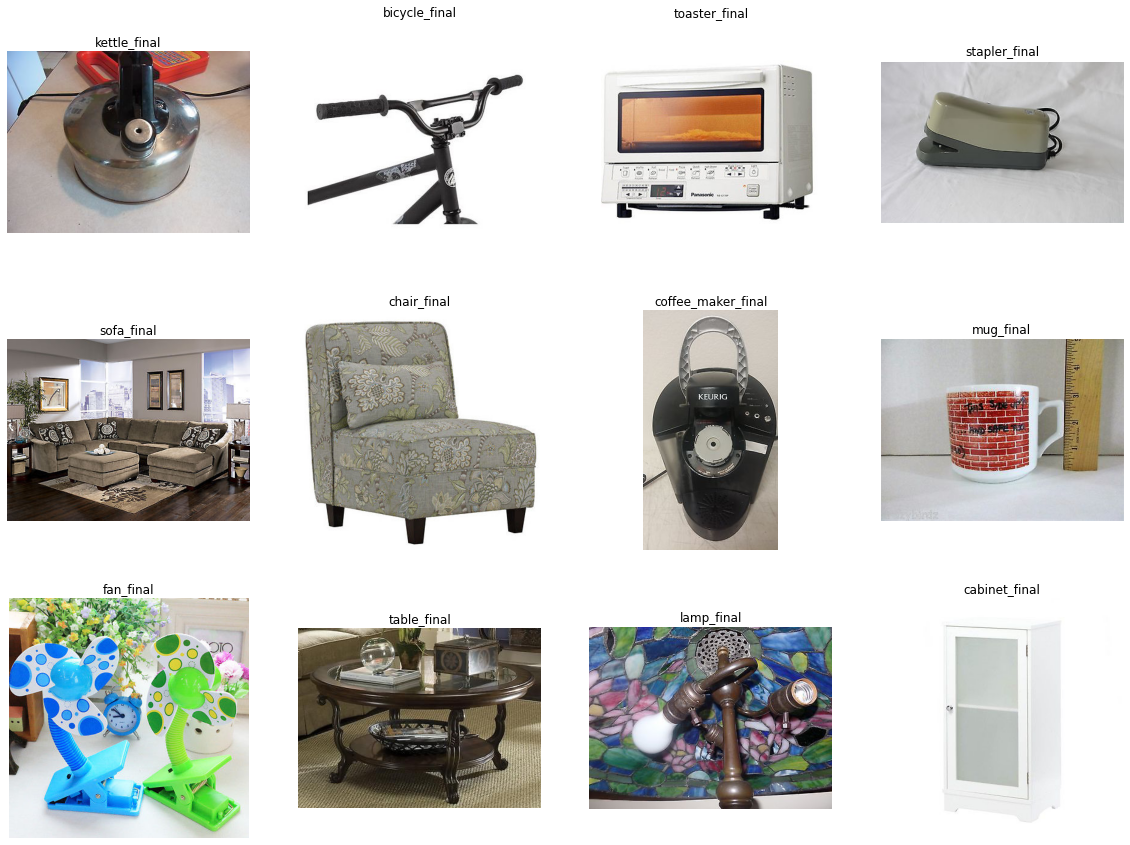

In [12]:
i = 1

pyplot.figure(figsize=(20,15))
for k in list(im_dict.keys()):
    fpath = dir_ds + k
    im = io.imread(fpath + "/" + im_dict[k][7])
    
    ax = pyplot.subplot(3, 4, i)
    pyplot.imshow(im)
    pyplot.title(k)
    pyplot.axis("off")
    
    i += 1

## The Convolution Architecture: Xception

In [13]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import utils

# load model pretrained with imagenet weights.
# include_top = false, we discard the classifier part
conv_base = Xception(weights="imagenet", include_top=False)
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

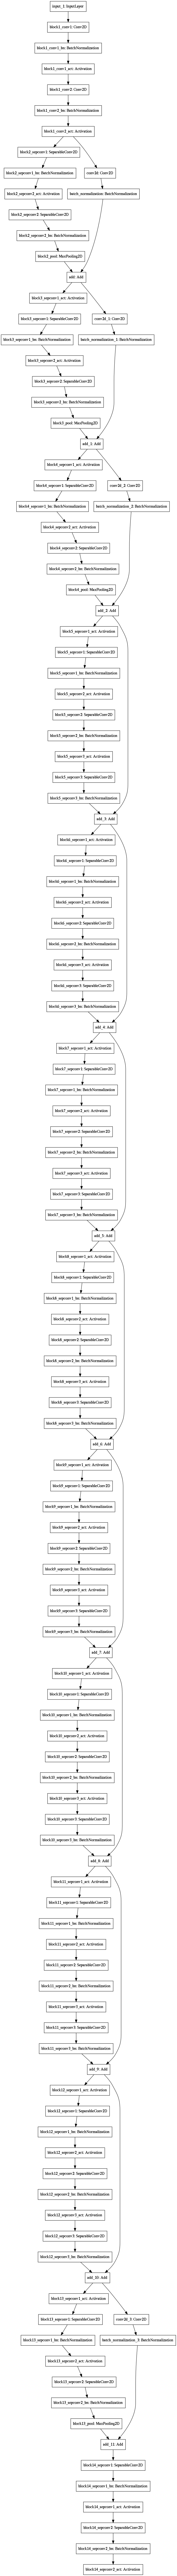

In [14]:
utils.plot_model(conv_base)